# Application Programming Interface (API)

Many existing resources provide their content via an API (typically implemented as the REST architecture, but you can also encounter SOAP or GraphQL). This is especially true for the major sequence and structure repositories, such as [UniProt](http://uniprot.org/) or [PDB](https://www.ebi.ac.uk/pdbe/). An API can be used either directly by the resource for its frontend functionality or can be maintained separately, enabling programmatic access to the data (or part of them). If the frontend is a web page, it is often possible to see the API endpoints in the [Network tab](https://developer.chrome.com/docs/devtools/network/reference/) of your browser. Check, for example, [AlphaFold DB entry for Alpha-synuclein](https://alphafold.ebi.ac.uk/entry/O55042).

## Acessing API

APIs can be explored in multiple ways, namely via the command line, dedicated software, or simply via the web browser.

### Command line
[Curl](https://curl.se/) is a command-line tool for transferring data, and it supports many protocols, including HTTP where it supports both [GET and POST requests](https://www.w3schools.com/tags/ref_httpmethods.asp).

Currently, there are issues with OpenSSL, and many HTTPS services do not work with curl. [Here](https://askubuntu.com/questions/1233186/ubuntu-20-04-how-to-set-lower-ssl-security-level) is a temporary fix.

```
curl https://rest.uniprot.org/uniprotkb/P12345?format=fasta
curl https://rest.uniprot.org/uniprotkb/P12345?format=xml
curl https://rest.uniprot.org/uniprotkb/P12345?format=json
```

### Web browser
Type the API endpoint URL in the address bar (this is possible for GET requests only as their payload is encoded in the [query string](https://en.wikipedia.org/wiki/Query_string)). The output can then be inspected inside the browser window. However, a better option is to use the [Developer tools](https://developer.chrome.com/docs/devtools/) of your browser, specifically, the [Network panel](https://developer.chrome.com/docs/devtools/network/) (F12->Network in Google Chrome) as the common return types (XML, JSON) are prettified and thus easier to browse through.

### Specialized tool

The most convenient way to explore APIs is to use specialized software such as [Postman](https://www.postman.com/).

### Programming library

To use an API in your code, the best option is to utilize a library in the programming language of your choice. In Python, the goto library is [requests](https://docs.python-requests.org/en/latest/), which can be installed with

```
pip install requests
```

In [1]:
import requests

## UniProt API

UniProt uses APIs that can be divided into [UniProt website API](https://www.uniprot.org/help/api) and [Proteins API](https://www.ebi.ac.uk/proteins/api/doc/).

### UniProt website API

UniProt website API includes the following functionality:
 - Accessing individual records (all the information available for a uniprot record on the records UniProt website)
 - Searching by query
 - Conversion service (not covered here)
 - Identifiers mapping (not covered here)

#### Accessing individual records

Accessing individual records can be done via the `https://rest.uniprot.org/uniprotkb/{uniprotId}?format={type}` endpoint, where `uniprotId` stands for, e.g. P12345 and `type` for `txt`, `xml`, `json`, `rdf`, `fasta` or `gff`. Different types return different ammounts of information. For example, using either `txt` or `xml` we can obtain all information about a protein that is available on the UniProt record web page. But with `fasta`, we will only get the sequence in the FASTA file format.

In [2]:
print(requests.get('https://rest.uniprot.org/uniprotkb/P12345?format=fasta').text)

>sp|P12345|AATM_RABIT Aspartate aminotransferase, mitochondrial OS=Oryctolagus cuniculus OX=9986 GN=GOT2 PE=1 SV=2
MALLHSARVLSGVASAFHPGLAAAASARASSWWAHVEMGPPDPILGVTEAYKRDTNSKKM
NLGVGAYRDDNGKPYVLPSVRKAEAQIAAKGLDKEYLPIGGLAEFCRASAELALGENSEV
VKSGRFVTVQTISGTGALRIGASFLQRFFKFSRDVFLPKPSWGNHTPIFRDAGMQLQSYR
YYDPKTCGFDFTGALEDISKIPEQSVLLLHACAHNPTGVDPRPEQWKEIATVVKKRNLFA
FFDMAYQGFASGDGDKDAWAVRHFIEQGINVCLCQSYAKNMGLYGERVGAFTVICKDADE
AKRVESQLKILIRPMYSNPPIHGARIASTILTSPDLRKQWLQEVKGMADRIIGMRTQLVS
NLKKEGSTHSWQHITDQIGMFCFTGLKPEQVERLTKEFSIYMTKDGRISVAGVTSGNVGY
LAHAIHQVTK



In [3]:
xml = requests.get('https://rest.uniprot.org/uniprotkb/P12345?format=xml').text

Now we can simply print out the XML:

In [4]:
print(xml)

<?xml version="1.0" encoding="UTF-8"  standalone="no" ?>
<uniprot xmlns="http://uniprot.org/uniprot" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://uniprot.org/uniprot http://www.uniprot.org/docs/uniprot.xsd">
<entry dataset="Swiss-Prot" created="1989-10-01" modified="2024-10-02" version="143" xmlns="http://uniprot.org/uniprot">
  <accession>P12345</accession>
  <accession>G1SKL2</accession>
  <name>AATM_RABIT</name>
  <protein>
    <recommendedName>
      <fullName>Aspartate aminotransferase, mitochondrial</fullName>
      <shortName>mAspAT</shortName>
      <ecNumber evidence="3">2.6.1.1</ecNumber>
      <ecNumber evidence="3">2.6.1.7</ecNumber>
    </recommendedName>
    <alternativeName>
      <fullName>Fatty acid-binding protein</fullName>
      <shortName>FABP-1</shortName>
    </alternativeName>
    <alternativeName>
      <fullName>Glutamate oxaloacetate transaminase 2</fullName>
    </alternativeName>
    <alternativeName>
      <fullName>Kynu

Or we can search for relevant information such as sequence with [ElementTree](https://docs.python.org/3/library/xml.etree.elementtree.html) library and [XPath](https://www.w3schools.com/xml/xpath_syntax.asp):

In [5]:
import xml.etree.ElementTree as ET
root = ET.fromstring(xml)
ns='{http://uniprot.org/uniprot}'
print(root.find(f'.//{ns}sequence').text)

MALLHSARVLSGVASAFHPGLAAAASARASSWWAHVEMGPPDPILGVTEAYKRDTNSKKMNLGVGAYRDDNGKPYVLPSVRKAEAQIAAKGLDKEYLPIGGLAEFCRASAELALGENSEVVKSGRFVTVQTISGTGALRIGASFLQRFFKFSRDVFLPKPSWGNHTPIFRDAGMQLQSYRYYDPKTCGFDFTGALEDISKIPEQSVLLLHACAHNPTGVDPRPEQWKEIATVVKKRNLFAFFDMAYQGFASGDGDKDAWAVRHFIEQGINVCLCQSYAKNMGLYGERVGAFTVICKDADEAKRVESQLKILIRPMYSNPPIHGARIASTILTSPDLRKQWLQEVKGMADRIIGMRTQLVSNLKKEGSTHSWQHITDQIGMFCFTGLKPEQVERLTKEFSIYMTKDGRISVAGVTSGNVGYLAHAIHQVTK


... or maybe cell compartments where that protein is located:

In [6]:
print([node.text for node in root.findall(f".//{ns}comment[@type='subcellular location']/{ns}subcellularLocation/{ns}location")])

['Mitochondrion matrix', 'Cell membrane']


#### Search by query

It is possible to search basically by any field present on the record website. Query fields that can be used in a query string are described [here](https://www.uniprot.org/help/query-fields), but the easiest way is probably to utilize the Advanced search functionality of UniProt and then copy the query string from the resulting URL.

The query string consists of the query and the format we would like the results to be in (such as `tab`, `txt`, `xml`, `fasta`, ...) and possibly [a few other parameters](https://www.uniprot.org/help/api_queries).

So one can, for example, search for all human proteins related to Alzheimer's disease with known protein structures:

In [7]:
print(requests.get('https://rest.uniprot.org/uniprotkb/search?query=organism_id:9606+AND+(database:pdb)+AND+cc_disease:alzheimer&format=tsv&fields=id,xref_pdb').text)

Entry Name	PDB
ABCA7_HUMAN	8EDW;8EE6;8EEB;8EOP;
SORL_HUMAN	2DM4;3G2S;3G2T;3WSX;3WSY;3WSZ;7VT0;
PSN2_HUMAN	7Y5X;7Y5Z;
OGT1_HUMAN	1W3B;3PE3;3PE4;3TAX;4AY5;4AY6;4CDR;4GYW;4GYY;4GZ3;4GZ5;4GZ6;4N39;4N3A;4N3B;4N3C;4XI9;4XIF;5BNW;5C1D;5HGV;5LVV;5LWV;5NPR;5NPS;5VIE;5VIF;6E37;6EOU;6IBO;6MA1;6MA2;6MA3;6MA4;6MA5;6Q4M;6TKA;7NTF;7YEA;7YEH;8CM9;8FE6;8FE7;8FUF;
GPC1_HUMAN	4ACR;4AD7;4BWE;4YWT;
A4_HUMAN	1AAP;1AMB;1AMC;1AML;1BA4;1BA6;1BJB;1BJC;1BRC;1CA0;1HZ3;1IYT;1MWP;1OWT;1QCM;1QWP;1QXC;1QYT;1TAW;1TKN;1X11;1Z0Q;1ZE7;1ZE9;1ZJD;2BEG;2BP4;2FJZ;2FK1;2FK2;2FK3;2FKL;2FMA;2G47;2IPU;2LFM;2LLM;2LMN;2LMO;2LMP;2LMQ;2LNQ;2LOH;2LP1;2LZ3;2LZ4;2M4J;2M9R;2M9S;2MGT;2MJ1;2MPZ;2MVX;2MXU;2NAO;2OTK;2R0W;2WK3;2Y29;2Y2A;2Y3J;2Y3K;2Y3L;3AYU;3BAE;3BKJ;3DXC;3DXD;3DXE;3GCI;3IFL;3IFN;3IFO;3IFP;3JQ5;3JQL;3JTI;3KTM;3L33;3L81;3MOQ;3MXC;3MXY;3NYJ;3NYL;3OVJ;3OW9;3PZZ;3Q2X;3SV1;3U0T;3UMH;3UMI;3UMK;4HIX;4JFN;4M1C;4MDR;4MVI;4MVK;4MVL;4NGE;4OJF;4ONF;4ONG;4PQD;4PWQ;4XXD;5AEF;5AM8;5AMB;5BUO;5C67;5CSZ;5HOW;5HOX;5HOY;5KK3;5LFY;5LV0;5MY4;5MYO;

### Proteins API

[Proteins API](https://www.ebi.ac.uk/proteins/api/doc/index.html) "*provides access to key biological data from UniProt and data from Large Scale Studies (LSS) mapped to UniProt. The services provide sequence feature annotations from UniProtKB, variation data from UniProtKB and mapped from LSS (1000 Genomes, ExAC, ClinVar, TCGA, COSMIC, TOPMed and gnomAD), proteomics data mapped from MS-proteomics repositories (PeptideAtlas, MaxQB, EPD and ProteomicsDB), antigen sequences mapped from Human Protein Atlas (HPA), proteomes and taxonomy search and retrieval, reference genome coordinate mappings and data from UniParc*".

In short, Proteins API can be used to obtain 1) residue-level annotations, for example, phosphorylation sites, 2) variation information, for example, which residues were observed to mutate and whether that mutation led to a disease, 3) genome coordinate mapping, for example, which position in the DNA is mapped to which position in the protein sequence or whether that position is actually part of an exon, and 4) taxonomy information.

In [8]:
import json
print(json.dumps(requests.get('https://www.ebi.ac.uk/proteins/api/variation/O76039').json(), indent=4))

{
    "accession": "O76039",
    "entryName": "CDKL5_HUMAN",
    "proteinName": "Cyclin-dependent kinase-like 5",
    "geneName": "CDKL5",
    "organismName": "Homo sapiens",
    "proteinExistence": "Evidence at protein level",
    "sequence": "MKIPNIGNVMNKFEILGVVGEGAYGVVLKCRHKETHEIVAIKKFKDSEENEEVKETTLRELKMLRTLKQENIVELKEAFRRRGKLYLVFEYVEKNMLELLEEMPNGVPPEKVKSYIYQLIKAIHWCHKNDIVHRDIKPENLLISHNDVLKLCDFGFARNLSEGNNANYTEYVATRWYRSPELLLGAPYGKSVDMWSVGCILGELSDGQPLFPGESEIDQLFTIQKVLGPLPSEQMKLFYSNPRFHGLRFPAVNHPQSLERRYLGILNSVLLDLMKNLLKLDPADRYLTEQCLNHPTFQTQRLLDRSPSRSAKRKPYHVESSTLSNRNQAGKSTALQSHHRSNSKDIQNLSVGLPRADEGLPANESFLNGNLAGASLSPLHTKTYQASSQPGSTSKDLTNNNIPHLLSPKEAKSKTEFDFNIDPKPSEGPGTKYLKSNSRSQQNRHSFMESSQSKAGTLQPNEKQSRHSYIDTIPQSSRSPSYRTKAKSHGALSDSKSVSNLSEARAQIAEPSTSRYFPSSCLDLNSPTSPTPTRHSDTRTLLSPSGRNNRNEGTLDSRRTTTRHSKTMEELKLPEHMDSSHSHSLSAPHESFSYGLGYTSPFSSQQRPHRHSMYVTRDKVRAKGLDGSLSIGQGMAARANSLQLLSPQPGEQLPPEMTVARSSVKETSREGTSSFHTRQKSEGGVYHDPHSDDGTAPKENRHLYNDPVPRRVGSFYRVPSPRPDNSFHENNVSTRVSSLPSESSSGTNHSKRQPA

There is a [features viewer](https://www.uniprot.org/uniprot/O76039/protvista) in UniProt called ProtVista which is  builds on top of Proteins API. You can explore its API calls using the developer tools (see above).

### ---- Begin Exercise ----

- Explore the API calls made by ProtVista in UniProt via your web browser to make familiar with the variations API (or read the Protein API docs) and list all known disease-related mutations in the human [CDKL5](https://en.wikipedia.org/wiki/CDKL5) gene (UniProt ID O76039O). 

### ---- End Exercise ----

## PDBe API

The [PDBe API](https://www.ebi.ac.uk/pdbe/api/doc/pdb.html) not only provides information about individual structure records and their components but also includes the [SIFTS mapping](https://www.ebi.ac.uk/pdbe/api/doc/sifts.html). SIFTS mapping represents a link between the sequence and available structures. For one sequence in UniProt, we can have multiple structures in PDB. For example, there currently exists [plenty](https://www.uniprot.org/uniprot/P0DTC2#structure) of structures for the SARS-CoV2 spike protein (which we touched upon in the previous labs).

First, let's check out how to get information about a PDB entry.

In [9]:
print(json.dumps(requests.get('https://www.ebi.ac.uk/pdbe/api/pdb/entry/summary/6vxx').json(), indent=4))

{
    "6vxx": [
        {
            "title": "Structure of the SARS-CoV-2 spike glycoprotein (closed state)",
            "processing_site": "RCSB",
            "deposition_site": "RCSB",
            "deposition_date": "20200225",
            "release_date": "20200311",
            "revision_date": "20210127",
            "experimental_method_class": [
                "em"
            ],
            "experimental_method": [
                "Electron Microscopy"
            ],
            "split_entry": [],
            "related_structures": [
                {
                    "resource": "EMDB",
                    "accession": "EMD-21452",
                    "relationship": "associated EM volume"
                }
            ],
            "entry_authors": [
                "Walls, A.C.",
                "Park, Y.J.",
                "Tortorici, M.A.",
                "Wall, A.",
                "Seattle Structural Genomics Center for Infectious Disease (SSGCID)",
             

As the S1 spike protein is a glykoprotein, the structure should also harbor some sugars (those help the virus to mask it from the immune system).

In [10]:
print(json.dumps(requests.get(' https://www.ebi.ac.uk/pdbe/api/pdb/entry/ligand_monomers/6vxx').json(), indent=4))

{
    "6vxx": [
        {
            "chain_id": "A",
            "author_residue_number": 1311,
            "author_insertion_code": "",
            "chem_comp_id": "NAG",
            "alternate_conformers": 0,
            "entity_id": 3,
            "struct_asym_id": "AA",
            "residue_number": 1,
            "chem_comp_name": "2-acetamido-2-deoxy-beta-D-glucopyranose",
            "weight": 221.208,
            "carbohydrate_polymer": false,
            "branch_name": ""
        },
        {
            "chain_id": "A",
            "author_residue_number": 1316,
            "author_insertion_code": "",
            "chem_comp_id": "NAG",
            "alternate_conformers": 0,
            "entity_id": 3,
            "struct_asym_id": "BA",
            "residue_number": 1,
            "chem_comp_name": "2-acetamido-2-deoxy-beta-D-glucopyranose",
            "weight": 221.208,
            "carbohydrate_polymer": false,
            "branch_name": ""
        },
        {
        

Mapping on both the molecule and residue level is provided by the SIFTS mapping. So to obtain all the structures of the spike protein available for the UniProt record together with the reisdue-level mapping, we can query the following API:

In [11]:
print(json.dumps(requests.get('https://www.ebi.ac.uk/pdbe/api/mappings/all_isoforms/P0DTC2').json(), indent=4))

{
    "P0DTC2": {
        "PDB": {
            "7y9n": [
                {
                    "entity_id": 1,
                    "chain_id": "A",
                    "struct_asym_id": "A",
                    "unp_start": 917,
                    "unp_end": 1204,
                    "identity": 0.4,
                    "is_canonical": true,
                    "start": {
                        "residue_number": 1,
                        "author_residue_number": null,
                        "author_insertion_code": ""
                    },
                    "end": {
                        "residue_number": 190,
                        "author_residue_number": null,
                        "author_insertion_code": ""
                    }
                },
                {
                    "entity_id": 2,
                    "chain_id": "B",
                    "struct_asym_id": "B",
                    "unp_start": 1168,
                    "unp_end": 1203,
               

Explore the remaining endpoints to find about the other functions PDBe API is offering.

In [12]:
len(requests.get('https://www.ebi.ac.uk/pdbe/api/mappings/all_isoforms/P0DTC2').json()["P0DTC2"]["PDB"])

1738

## PDBe-KB API
[PDBe-KB](https://www.ebi.ac.uk/pdbe/pdbe-kb/) collates functional annotations and predictions for structure data in the PDB archive. It basically integrates the PDBe functionality with additional annotations, such as predicted binding sites and other features. It is built over a large graph database (each residue is a node) which can be downloaded or queried over an [API](https://www.ebi.ac.uk/pdbe/graph-api/pdbe_doc/). You can, for example, ask about protein residues which are in contact with a ligand:

In [ ]:
print(json.dumps(requests.get('https://www.ebi.ac.uk/pdbe/graph-api/pdbe_pages/interfaces/6x29/1').json(), indent=4))

Explore the remaining endpoints to find about the other functions PDBe-KB API is offering.

## NCBI Entrez API

The Entrez [API](https://www.ncbi.nlm.nih.gov/home/develop/api/) provides access *to the NCBI Entrez system and allow access to all Entrez databases including PubMed, PMC, Gene, Nuccore and Protein*.

The main API endpoint for fetching information is in the form of 

```
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=<database>&term=<query>
```

Where the database names can be obtained with:

```
https://eutils.ncbi.nlm.nih.gov/entrez/eutils/einfo.fcgi
```

For example, to get information about the protein sequence of the SARS-CoV2 polyprotein we touched upon in the last labs, we can run the following code (the protein ID can be found in the RefSeq record of the corresponding gene).


In [14]:
print(requests.get('https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=protein&id=YP_009724389.1&rettype=gp&retmode=text').text)

LOCUS       YP_009724389            7096 aa            linear   VRL 18-JUL-2020
DEFINITION  ORF1ab polyprotein [Severe acute respiratory syndrome coronavirus
            2].
ACCESSION   YP_009724389
VERSION     YP_009724389.1
DBLINK      BioProject: PRJNA485481
DBSOURCE    REFSEQ: accession NC_045512.2
KEYWORDS    RefSeq.
SOURCE      Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
  ORGANISM  Severe acute respiratory syndrome coronavirus 2
            Viruses; Riboviria; Orthornavirae; Pisuviricota; Pisoniviricetes;
            Nidovirales; Cornidovirineae; Coronaviridae; Orthocoronavirinae;
            Betacoronavirus; Sarbecovirus; Severe acute respiratory
            syndrome-related coronavirus.
REFERENCE   1  (residues 1 to 7096)
  AUTHORS   Wu,F., Zhao,S., Yu,B., Chen,Y.M., Wang,W., Song,Z.G., Hu,Y.,
            Tao,Z.W., Tian,J.H., Pei,Y.Y., Yuan,M.L., Zhang,Y.L., Dai,F.H.,
            Liu,Y., Wang,Q.M., Zheng,J.J., Xu,L., Holmes,E.C. and Zhang,Y.Z.
  TITLE     A ne

## OpenTargets Platform API

The last API we will look at in a bit more detail is the [Open Targets Platform](https://opentargets.org) [API](https://platform-docs.opentargets.org/data-access/graphql-api). This is for two reasons: i) Open Targets is a rich source of information regarding genes, diseases, and drugs (thus usable for drug candidate identification) with a cool web interface :) and ii) the API is a GraphQL API, i.e., to query the API, we need to use [GraphQL](https://graphql.org/), a query language becoming more and more popular.

In GraphQL, all queries are POST queries (no GET queries) where the content of the body contains a query structure which is displayed in the following image (arguments can be passed in the query string):

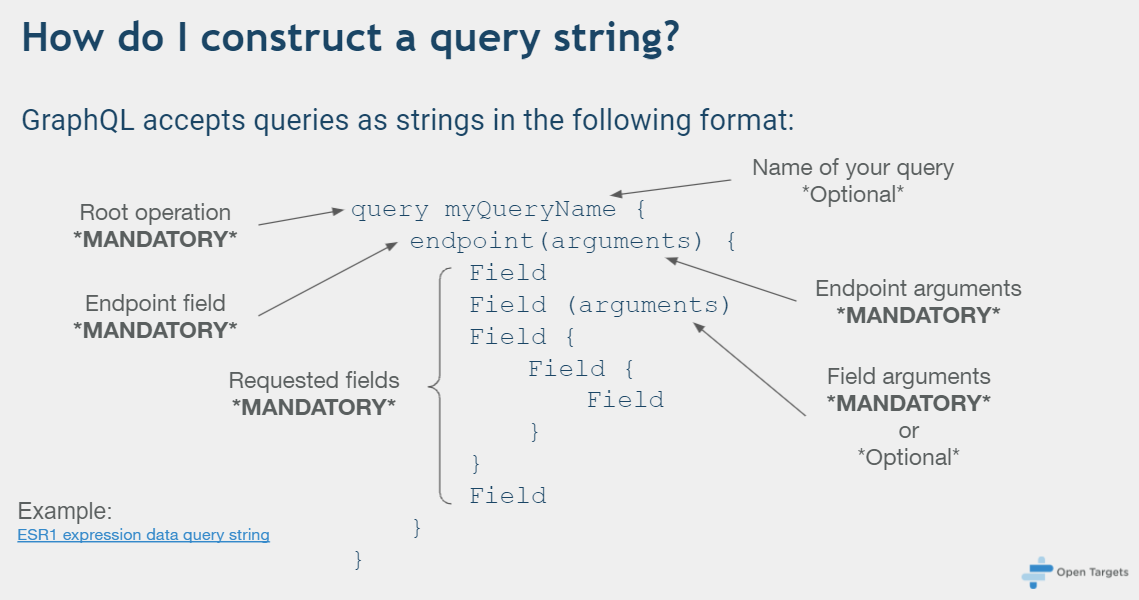

In [16]:
gene_id = "ENSG00000188906" #Ensembl ID (Ensembl is a genome browser for vertebrate genomes that supports research in comparative genomics, evolution, sequence variation and transcriptional regulation. Ensembl annotates genes, computes multiple sequence alignments, predicts regulatory function and collects disease data. Ensembl tools include BLAST, BLAT, BioMart and the Variant Effect Predictor (VEP) for all supported species.)

query_string = """
 query queryTarget($ensemblId: String!){
   target(ensemblId: $ensemblId){
     id
     approvedSymbol
     approvedName
     genomicLocation{
       chromosome
       start
       end
       strand
     }
   }
 }
"""
variables = {"ensemblId": gene_id}

base_url = "https://api.platform.opentargets.org/api/v4/graphql"

r = requests.post(base_url, json={"query": query_string, "variables": variables})
#print(r.status_code)

print(json.dumps(r.json(), indent=4))


{
    "data": {
        "target": {
            "id": "ENSG00000188906",
            "approvedSymbol": "LRRK2",
            "approvedName": "leucine rich repeat kinase 2",
            "genomicLocation": {
                "chromosome": "12",
                "start": 40196744,
                "end": 40369285,
                "strand": 1
            }
        }
    }
}


The queries can be built using the [API Playground](https://api.platform.opentargets.org/api/v4/graphql/browser), which contains both documentation and schema definition. However, if lost, I suggest using the browser developer tools network panel (see above) to see how the Open Targets Platform constructs queries and modify them to fit your needs. Follows two examples of queries that will need to be adjusted to accomplish the last exercise (see the end of the notebook). EFO ID is the ID of the disease in the [Experimental Factor Ontology](https://www.ebi.ac.uk/efo/).

In [17]:
efoId = "MONDO_0004975" # Alzheimer disease (Mondo Disease Ontology - https://www.ebi.ac.uk/ols/ontologies/mondo)

targets = """
query simpleQuery($efoId: String!){
  ## get the disease information for the efoId passed to the query
  disease(efoId: $efoId){
    ## retrieve the name of the disease 
    name
    ## get the targets associated with the disease
    associatedTargets{
      ## for each associated target, get the following information
      rows{
        target{
          ## ensembl ID
          id
          ## approved gene name
          approvedName
        }
        ## the overall association score between the target and disease
        score
        ##  the id and score for each evidence datatype (genetic, literature, etc)
        datatypeScores{
          id
          score
        }
      }
    }
  }
}
"""
variables = {"efoId": efoId}

uniprot_variants = """
 query UniprotVariantsQuery($ensemblId: String!, $efoId: String!) {
  disease(efoId: $efoId) {
    id
    evidences(ensemblIds: [$ensemblId], enableIndirect: true, datasourceIds: ["uniprot_variants"]) {
      rows {
        disease {
          id
          name          
        }
        diseaseFromSource
        targetFromSourceId        
        confidence        
      }      
    }    
  }
}
 """

## Other APIs worth mentioning

 - [Ensamble](http://www.ensembl.org/index.html) [REST API](https://rest.ensembl.org/)
 - [ChEBML](https://www.ebi.ac.uk/chembl/) [API](https://www.ebi.ac.uk/chembl/api/data/docs)
 - [Pubchem](https://pubchem.ncbi.nlm.nih.gov/) [API](https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest)
 - [Europe PMC](https://europepmc.org/) [REST API](https://europepmc.org/RestfulWebService)
     * https://gitlab.lcsb.uni.lu/david.hoksza/epmc-api -> [Visualization](https://public.tableau.com/app/profile/david.hoksza/viz/Parkinsonsdiseasetextmining/URI-groupedgenes)
 - [DisGeNET](https://www.disgenet.org/) [REST API](https://www.disgenet.org/api/)
 - [MyVariant.info](https://myvariant.info/)
    

### ---- Begin Exercise ----

_Carry out the first two steps only .... do 3 and 4 only if you are hardcore enough ;-)_

1. Find 5 genes most strongly asociated with the Parkinson's disease and output their names (OpenTargets API - Ensemble ids from simpleQuery) 
2. For each gene, output UniProt IDs of protein sequences containing at least one disease related variant (OpenTargets API - targetFromSourceId and variantRsId from UniprotVariantsQuery)
3. Find protein sequence positions of those variant in UniProt (UniProt API \[txt, xml, or json\])
4. List PDB codes of protein structures which are available for those positions (known experimental structure does not have to cover the full length of the sequnece) (PDBe-KB API - uniprot/:accession endpoint)

### ---- End Exercise ----